In [ ]:
!pip install keras

In [ ]:
import pandas as pd
import numpy as np
import sklearn.model_selection as model_selection

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
data='/content/drive/My Drive/Colab Notebooks/data/preprocessed_final_data_4000.csv'

In [ ]:
df=pd.read_csv(data)

In [ ]:
df.head()

,ID,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,Feature 11,Feature 12,Feature 13,Feature 14,Feature 15,Feature 16,Feature 17,Feature 18,Feature 19,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29,Feature 30,Feature 31,Feature 32,Feature 33,Feature 34,Feature 35,Feature 36,Feature 37,Feature 38,Feature 39,...,Feature 730,Feature 731,Feature 732,Feature 733,Feature 734,Feature 735,Feature 736,Feature 737,Feature 738,Feature 739,Feature 740,Feature 741,Feature 742,Feature 743,Feature 744,Feature 745,Feature 746,Feature 747,Feature 748,Feature 749,Feature 750,Feature 751,Feature 752,Feature 753,Feature 754,Feature 755,Feature 756,Feature 757,Feature 758,Feature 759,Feature 760,Feature 761,Feature 762,Feature 763,Feature 764,Feature 765,Feature 766,Feature 767,Feature 768,Target
0,1,-0.936668,-0.607745,-0.971644,0.906564,0.710226,-0.217736,0.971733,0.472403,-0.944857,-0.999998,-0.521600,0.976992,0.982835,0.861315,0.971165,-0.885708,-0.608097,-0.686793,0.471910,-0.780494,0.874879,0.999999,-0.125588,0.464901,0.630205,0.997927,-0.849345,0.949077,0.967011,0.743191,-0.889223,0.261203,-0.986672,-0.351788,-0.978735,-0.994847,0.524205,-0.774010,-0.335413,...,-0.496791,-0.504688,-0.795810,0.910873,-0.356882,-0.726149,-0.829212,0.798539,0.396873,0.999999,-0.933158,-0.972226,-0.300956,-0.498965,0.564346,-0.731317,-1.0,0.551755,-0.494463,0.912322,-0.894227,0.921256,-0.734271,-0.991111,-0.448701,0.438216,0.801548,-0.598333,-0.742764,0.805187,-0.082170,0.987108,0.878809,0.028858,-0.307731,0.863470,-0.860803,-0.771054,0.937823,0
1,2,-0.870855,-0.336693,-0.782189,0.706973,0.523014,-0.212682,0.800420,0.283358,-0.748206,-0.999959,-0.291852,0.900708,0.985528,0.503885,0.948840,-0.690409,-0.243278,-0.611100,0.333671,-0.409054,0.757800,0.999900,0.103826,0.360839,0.536826,0.967376,-0.689697,0.950429,0.953097,0.771403,-0.757181,0.125369,-0.992129,-0.291051,-0.833287,-0.992755,0.283396,-0.696919,-0.039697,...,-0.382095,-0.324463,-0.607108,0.738470,-0.598636,-0.641167,-0.561231,0.709682,0.282903,0.999923,-0.687216,-0.830045,-0.326938,-0.279708,0.466404,-0.571712,-1.0,0.375189,-0.270737,0.535903,-0.751424,0.749803,-0.412159,-0.974629,-0.251667,0.644405,0.533538,-0.421151,-0.566868,0.687806,0.451068,0.868721,0.804932,-0.048262,0.201346,0.745513,-0.535487,-0.687749,0.929772,0
2,3,-0.858335,-0.411646,-0.672123,0.772433,0.426000,-0.184154,0.833121,0.279674,-0.673766,-0.999979,-0.160522,0.798659,0.979453,0.355778,0.908322,-0.556282,-0.357901,-0.545231,0.390059,-0.368534,0.648673,0.999907,0.384770,0.260368,0.546552,0.972229,-0.708103,0.924021,0.953919,0.677825,-0.652704,0.238561,-0.986791,-0.313812,-0.861554,-0.992233,0.312758,-0.808803,-0.188253,...,-0.440093,-0.344442,-0.654087,0.785006,-0.044339,-0.486701,-0.664666,0.658621,0.350458,0.999866,-0.419628,-0.714743,-0.208437,-0.392793,0.393726,-0.502598,-1.0,0.397329,-0.091559,0.482912,-0.471686,0.616530,-0.428208,-0.952621,-0.394262,0.275466,0.653910,-0.579922,-0.612315,0.569443,0.069375,0.932594,0.863593,0.546695,0.332614,0.726275,-0.347944,-0.707306,0.932698,0
3,4,-0.652220,-0.377211,-0.900006,0.662173,0.616348,-0.138148,0.714782,0.214639,-0.763173,-0.999874,-0.176977,0.862026,0.945139,0.656108,0.865391,-0.648621,-0.256104,-0.560306,0.354569,0.038988,0.726145,0.999980,0.101063,0.256657,0.451538,0.959098,-0.558975,0.889627,0.897534,0.685733,-0.652211,0.157717,-0.975257,-0.239951,-0.945671,-0.978359,0.343718,-0.479885,-0.244065,...,-0.305886,-0.261447,-0.530659,0.550404,-0.417672,-0.590193,-0.582609,0.533166,0.396605,0.999975,-0.757028,-0.792973,-0.098658,-0.248646,0.428697,-0.585934,-1.0,0.315033,-0.140241,0.747297,-0.721730,0.795057,-0.407663,-0.928240,-0.326498,0.505339,0.643500,-0.419024,-0.409596,0.693646,0.568506,0.887683,0.693874,0.360072,0.004574,0.788199,-0.744899,-0.629803,0.840479,0
4,5,-0.826683,-0.340905,-0.478770,0.661909,0.192390,-0.087786,0.806649,0.298721,-0.399448,-0.999938,0.2758

In [ ]:
df=df.drop(['ID','Target'],axis=1)

In [ ]:
X=df[:]
y=[0 for x in range(2000)]+[1 for y in range(2000)]

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.65,test_size=0.35, random_state=101)
print ("X_train: ", X_train)
print ("y_train: ", y_train)
print("X_test: ", X_test)
print ("y_test: ", y_test)

X_train:        Feature 1  Feature 2  Feature 3  ...  Feature 766  Feature 767  Feature 768
2166  -0.743679  -0.448635  -0.823576  ...    -0.551191    -0.599945     0.666731
3403  -0.736664  -0.583761  -0.948207  ...    -0.695864    -0.775422     0.804209
2308  -0.837024  -0.482790  -0.914160  ...    -0.804352    -0.662123     0.820508
3292  -0.573492  -0.461850  -0.967838  ...    -0.788695    -0.635226     0.564135
2810  -0.763873  -0.548033  -0.972949  ...    -0.925398    -0.679140     0.767362
...         ...        ...        ...  ...          ...          ...          ...
1599  -0.573621  -0.375964  -0.697506  ...    -0.303165    -0.583584     0.779749
3910  -0.677524  -0.313311  -0.839104  ...    -0.571915    -0.551919     0.764706
1361  -0.737356  -0.558346  -0.861774  ...    -0.707370    -0.653912     0.859169
1547  -0.962977  -0.361360  -0.909049  ...    -0.699194    -0.712669     0.967582
863   -0.863552  -0.340193  -0.757528  ...    -0.502255    -0.636921     0.893480

[2600

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
model = keras.Sequential()
model.add(keras.Input(shape=(768,)))
model.add(layers.Dense(2, activation="sigmoid"))


model.summary()


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 2)                 1538      
Total params: 1,538
Trainable params: 1,538
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_train=np.array(X_train)
y_train=np.array(y_train)

In [ ]:
model.compile(optimizer = 'adam',loss='sparse_categorical_crossentropy',metrics =['accuracy'])

In [ ]:
from matplotlib import pyplot

Epoch 1/100
82/82 - 0s - loss: 0.6095 - accuracy: 0.6892
Epoch 2/100
82/82 - 0s - loss: 0.3942 - accuracy: 0.8373
Epoch 3/100
82/82 - 0s - loss: 0.3302 - accuracy: 0.8731
Epoch 4/100
82/82 - 0s - loss: 0.2956 - accuracy: 0.8862
Epoch 5/100
82/82 - 0s - loss: 0.2832 - accuracy: 0.8919
Epoch 6/100
82/82 - 0s - loss: 0.2572 - accuracy: 0.9038
Epoch 7/100
82/82 - 0s - loss: 0.2453 - accuracy: 0.9108
Epoch 8/100
82/82 - 0s - loss: 0.2342 - accuracy: 0.9127
Epoch 9/100
82/82 - 0s - loss: 0.2216 - accuracy: 0.9173
Epoch 10/100
82/82 - 0s - loss: 0.2198 - accuracy: 0.9235
Epoch 11/100
82/82 - 0s - loss: 0.2127 - accuracy: 0.9238
Epoch 12/100
82/82 - 0s - loss: 0.2010 - accuracy: 0.9300
Epoch 13/100
82/82 - 0s - loss: 0.1968 - accuracy: 0.9269
Epoch 14/100
82/82 - 0s - loss: 0.1899 - accuracy: 0.9319
Epoch 15/100
82/82 - 0s - loss: 0.1893 - accuracy: 0.9288
Epoch 16/100
82/82 - 0s - loss: 0.1851 - accuracy: 0.9358
Epoch 17/100
82/82 - 0s - loss: 0.1807 - accuracy: 0.9354
Epoch 18/100
82/82 - 0s

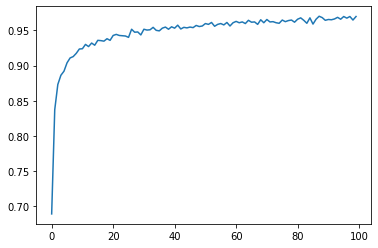

In [ ]:
# train model
history = model.fit(X_train, y_train, epochs=100, verbose=2)
# plot metrics
pyplot.plot(history.history['accuracy'])
pyplot.show()

In [ ]:
X_test=np.array(X_test)
y_test=np.array(y_test)

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)

In [ ]:
print(scores)

[0.10069078952074051, 0.9685714244842529]
